<a href="https://colab.research.google.com/github/mimilazarova/DD2424-covid-xray-project/blob/master/covid_model_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import os
import sys

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dirname = '/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/data'
with open(os.path.join(dirname, 'trainX1.pickle'), 'rb') as f:
  trainX = pickle.load(f)

with open(os.path.join(dirname, 'testX.pickle'), 'rb') as f:
  testX = pickle.load(f)
with open(os.path.join(dirname, 'test_y.pickle'), 'rb') as f:
  test_y = pickle.load(f)

testN = testX.shape[0]
testX = testX.reshape((testN, 224, 224, 1))

trainN = trainX.shape[0]
trainX = trainX.reshape((trainN, 224, 224, 1))

In [7]:
dirname = "/content/drive/My Drive/KTH/Year 1/DD2424 Deep Learning/DD2424_Project/"
filename = "model8-undersampling-weights-augmentation.hdf5"
model = keras.models.load_model(os.path.join(dirname, filename))

test_y_pred_m = model.predict(testX)
test_y_pred8 = np.argmax(test_y_pred_m, axis=1)

conf_matrix = confusion_matrix(test_y, test_y_pred8, labels=[0, 1, 2])
print("Test set")
print(conf_matrix)
print(classification_report(test_y, test_y_pred8, digits=3))

Test set
[[95  5  0]
 [ 9 89  2]
 [ 2  2 27]]
              precision    recall  f1-score   support

           0      0.896     0.950     0.922       100
           1      0.927     0.890     0.908       100
           2      0.931     0.871     0.900        31

    accuracy                          0.913       231
   macro avg      0.918     0.904     0.910       231
weighted avg      0.914     0.913     0.913       231



In [1]:
# pip install shap

     |████████████████████████████████| 276kB 2.5MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394123 sha256=5ab9bd2672c3dec7e5b2bcecf01ba8e8a901e716c6563e32890c7d03a0f3fda5
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
import shap
sys.setrecursionlimit(1000000)

shap.explainers.deep.deep_tf.op_handlers["AddV2"] = shap.explainers.deep.deep_tf.passthrough
shap.explainers.deep.deep_tf.op_handlers["FusedBatchNormV3"] = shap.explainers.deep.deep_tf.passthrough

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, trainX[:50, :, :, :])

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(testX[:10, :, :, :])

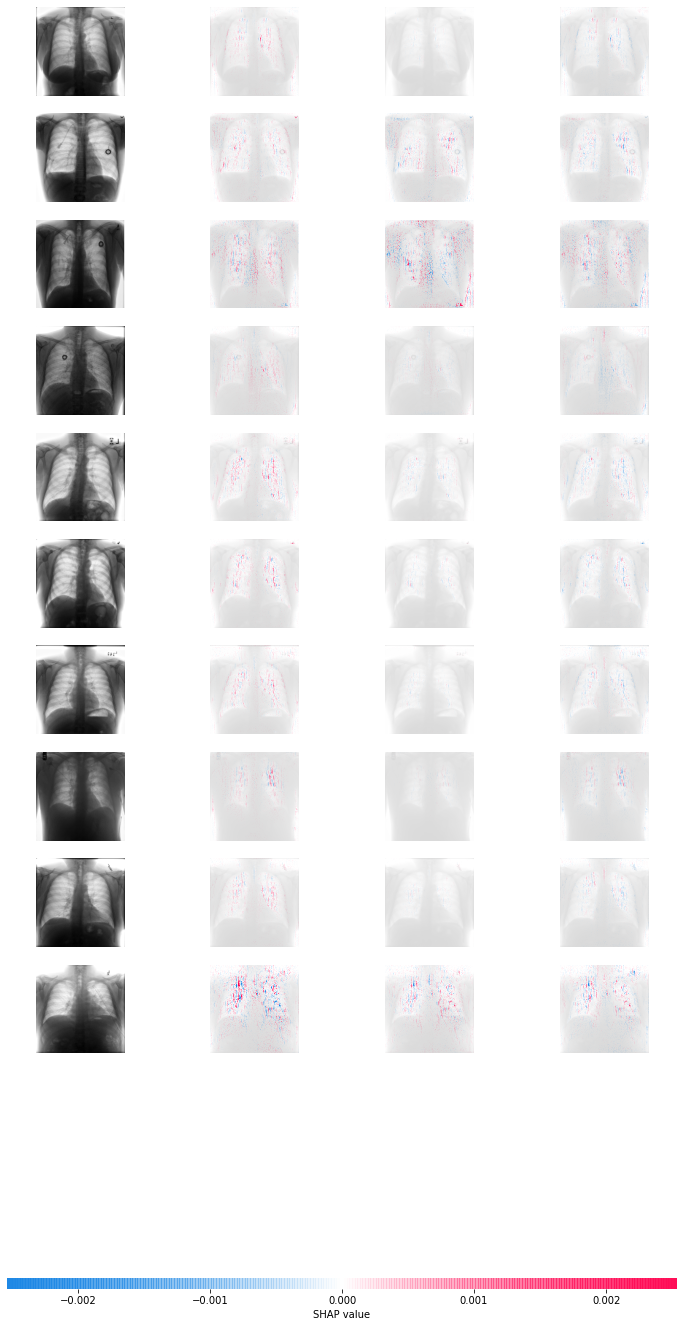

In [40]:
shap_numpy = [s for s in shap_values] #[np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = testX[:10, :, :, :]
shap.image_plot(shap_numpy, -test_numpy)